In [1]:
%run -i evaluation

waldo: 0.6923076923076923
wenda: 0.29761904761904756
wizard: 0.10897435897435898
meanAP: 0.3663003663003663


In [ ]:
%run -i vis_anno -imageID 007

datasets/JPEGImages/003.jpg


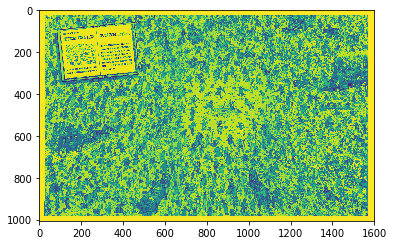

datasets/JPEGImages/018.jpg


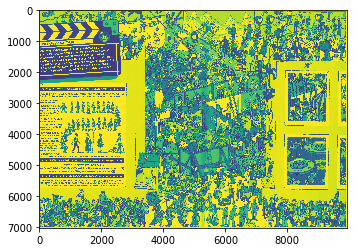

error: OpenCV(3.4.2) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:367: error: (-215:Assertion failed) u != 0 in function 'cv::Mat::create'


In [34]:
%run -i find_waldo

In [4]:
print(dst)
print(dst.shape)

[[[1197.5376    122.65297 ]]

 [[1211.4246    251.04881 ]]

 [[1311.6743    238.5898  ]]

 [[1302.2388    119.989716]]]
(4, 1, 2)


In [23]:
%run -i evaluation

waldo: 0.0
wenda: 0.0
wizard: 0.0
meanAP: 0.0


In [28]:
print(test_ids)
print(test_ids.shape)

003
018
036
043
038
056
067
074



AttributeError: 'str' object has no attribute 'shape'